In [20]:
import os 
import sys
import pickle
import numpy as np
import matplotlib.pyplot as plt

PROJECT_ROOT = os.path.abspath(os.path.join(os.path.abspath('../..'),os.pardir))
sys.path.append(PROJECT_ROOT)

from electronTransportCode.MCEstimator import MomentumTypeEstimator
from electronTransportCode.MCParticleTracer import AnalogParticleTracer, KDMC
from electronTransportCode.SimulationDomain import SimulationDomain

%matplotlib widget

In [21]:
momentumEstimatorK1: MomentumTypeEstimator = pickle.load(open('data/TrackEndEstimatorK1.pkl', 'rb'))[0]
momentumEstimatorKD1: MomentumTypeEstimator = pickle.load(open('data/TrackEndEstimatorKD1.pkl', 'rb'))[0]
momentumEstimatorK2: MomentumTypeEstimator = pickle.load(open('data/TrackEndEstimatorK2.pkl', 'rb'))[0]
momentumEstimatorKD2: MomentumTypeEstimator = pickle.load(open('data/TrackEndEstimatorKD2.pkl', 'rb'))[0]
eSource, NB_PARTICLES = pickle.load(open('data/simargv.pkl', 'rb'))
particleTracerK: AnalogParticleTracer = pickle.load(open('data/particleTracerK.pkl', 'rb'))
particleTracerKD: KDMC = pickle.load(open('data/particleTracerKD.pkl', 'rb'))
simDomain: SimulationDomain = particleTracerK.simDomain
bins = simDomain.xbins
xBins = np.linspace(simDomain.xmin, simDomain.xmax, bins+1)
yBins = np.linspace(simDomain.ymin, simDomain.ymax, bins+1)

print(eSource, NB_PARTICLES)

30.0 1000000


Text(0.5, 1.0, 'Energy Momentum along z axis')

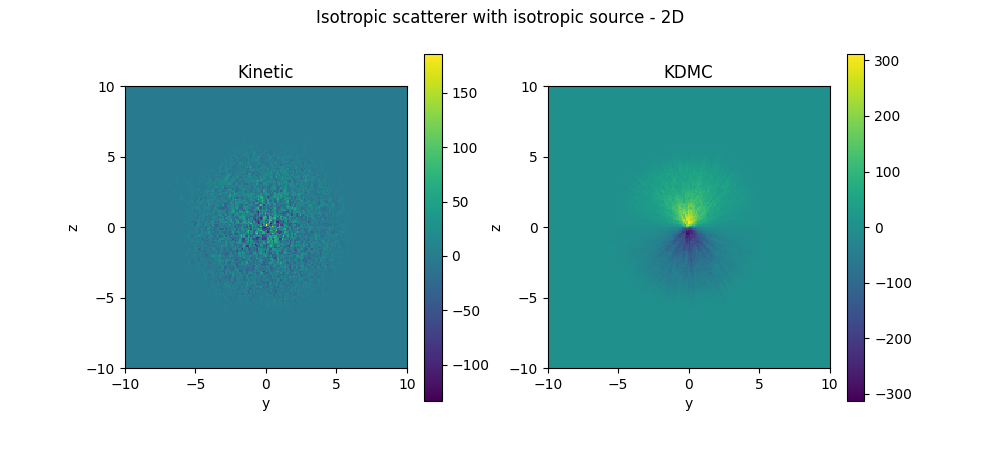

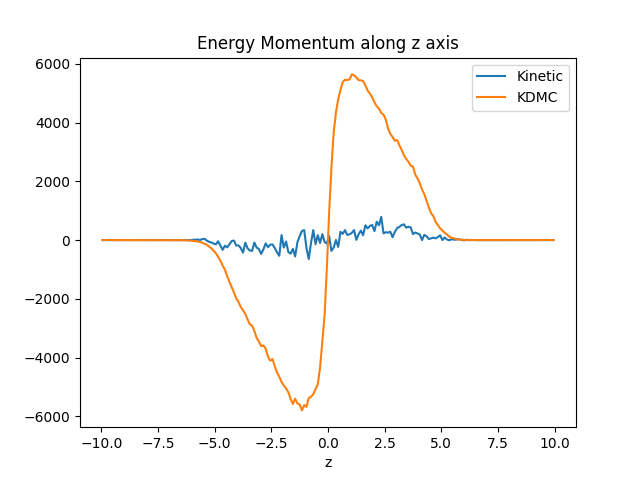

In [22]:
momentumK1 = np.reshape(momentumEstimatorK1.scoreMatrix, (bins, bins))
momentumKD1 = np.reshape(momentumEstimatorKD1.scoreMatrix, (bins, bins))

fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4.5))
fig1.suptitle('Isotropic scatterer with isotropic source - 2D')

pox1 = ax1.matshow(np.flipud(momentumK1), extent=[xBins.min(), xBins.max(), yBins.min(), yBins.max()])
ax1.xaxis.tick_bottom()
ax1.set_xlabel('y')
ax1.set_ylabel('z')
ax1.set_title('Kinetic')
fig1.colorbar(pox1, ax=ax1)

pox2 = ax2.matshow(np.flipud(momentumKD1), extent=[xBins.min(), xBins.max(), yBins.min(), yBins.max()])
ax2.xaxis.tick_bottom()
ax2.set_xlabel('y')
ax2.set_ylabel('z')
ax2.set_title('KDMC')
fig1.colorbar(pox2, ax=ax2)

binEdge = np.linspace(simDomain.xmin, simDomain.xmax, bins+1)
binCenter = (binEdge[:-1] + binEdge[1:])/2.0
fig2, ax3 = plt.subplots()
ax3.plot(binCenter, momentumK1.sum(axis=1), label='Kinetic')
ax3.plot(binCenter, momentumKD1.sum(axis=1), label='KDMC')
ax3.legend()
ax3.set_xlabel('z')
ax3.set_title('Energy Momentum along z axis')

Text(0.5, 1.0, 'Energy Momentum along z axis')

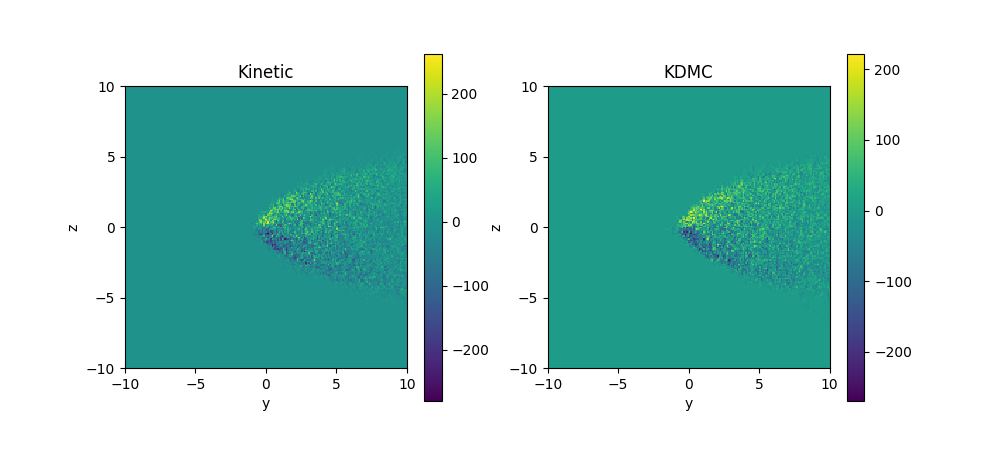

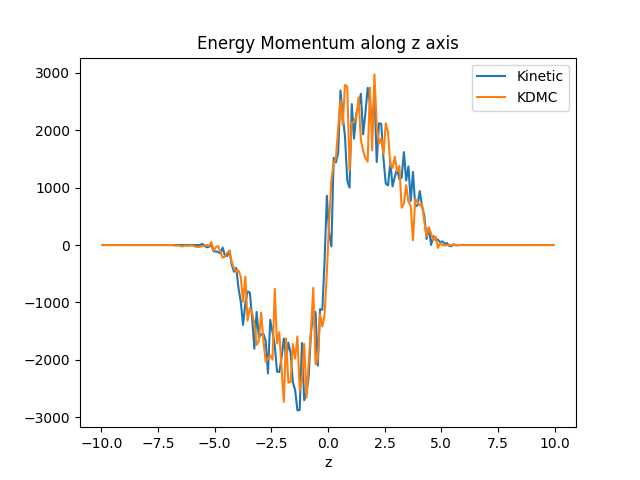

In [23]:
momentumK2 = np.reshape(momentumEstimatorK2.scoreMatrix, (bins, bins))
momentumKD2 = np.reshape(momentumEstimatorKD2.scoreMatrix, (bins, bins))

fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4.5))

pox1 = ax1.matshow(np.flipud(momentumK2), extent=[xBins.min(), xBins.max(), yBins.min(), yBins.max()])
ax1.xaxis.tick_bottom()
ax1.set_xlabel('y')
ax1.set_ylabel('z')
ax1.set_title('Kinetic')
fig1.colorbar(pox1, ax=ax1)

pox2 = ax2.matshow(np.flipud(momentumKD2), extent=[xBins.min(), xBins.max(), yBins.min(), yBins.max()])
ax2.xaxis.tick_bottom()
ax2.set_xlabel('y')
ax2.set_ylabel('z')
ax2.set_title('KDMC')
fig1.colorbar(pox2, ax=ax2)

binEdge = np.linspace(simDomain.xmin, simDomain.xmax, bins+1)
binCenter = (binEdge[:-1] + binEdge[1:])/2.0
fig2, ax3 = plt.subplots()
ax3.plot(binCenter, momentumK2.sum(axis=1), label='Kinetic')
ax3.plot(binCenter, momentumKD2.sum(axis=1), label='KDMC')
ax3.legend()
ax3.set_xlabel('z')
ax3.set_title('Energy Momentum along z axis')